In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np

In [2]:
def rk4(func, initial, deltas):
    ys = [initial]
    for i in range(1, len(xs)):
        old = np.array(ys[-1][:])
        dt = xs[i] - xs[i - 1]
        d1 = np.array(func(old, xs[i])) * dt
        d2 = np.array(func(old + 0.5 * d1, xs[i] + 0.5 * dt)) * dt
        d3 = np.array(func(old + 0.5 * d2, xs[i] + 0.5 * dt)) * dt
        d4 = np.array(func(old + d3, xs[i] + dt)) * dt
        better = old + ((d1 + 2 * d2 + 2 * d3 + d4) / 6.0)
        ys.append(better)
    return np.array(ys)

# Seasonal rate change

In [21]:
POP = 1000
I = 1
S = POP - I
R = 0

num_contacts = 15
prob_trans = 0.03
duration = 10
immunity = 50

beta = num_contacts * prob_trans / POP
gamma = 1 / duration
alpha = 1 / immunity

sim_length = 240

r_0 = beta / gamma
r_0

0.004499999999999999

$R_0$

In [44]:
import math
def bt(t):
    return beta * (1 - math.cos(25 * math.radians(t)))

In [45]:
def SIR(u, t):
    S, I, R = u
    dS = -bt(t) * I * S + alpha * R
    dI = bt(t) * I * S - gamma * I
    dR = gamma * I - alpha * R
    return np.array([dS, dI, dR])

In [46]:
xs = np.linspace(0, sim_length, sim_length * 300)
ys = rk4(SIR, [S, I, R], xs)

In [47]:
df = pd.DataFrame(ys, columns=["Susceptible", "Infected", "Recovered"])
df["Time"] = xs

In [48]:
dfmelt=pd.melt(df, id_vars=['Time'], 
               value_vars=["Susceptible", "Infected", "Recovered"], 
               var_name='Categories', value_name='Population')
dfmelt

,Time,Categories,Population
0,0.000000,Susceptible,999.000000
1,0.003333,Susceptible,999.000000
2,0.006667,Susceptible,999.000000
3,0.010000,Susceptible,999.000000
4,0.013334,Susceptible,999.000000
...,...,...,...
215995,239.986666,Recovered,646.919078
215996,239.990000,Recovered,646.928741
215997,239.993333,Recovered,646.938409
215998,239.996667,Recovered,646.948083


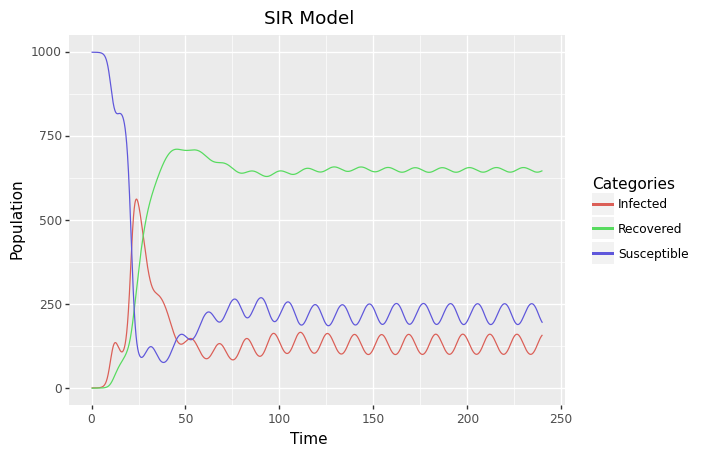

<ggplot: (8786744281341)>

In [49]:
ggplot(dfmelt, aes(x="Time", y="Population", color="Categories")) \
+ geom_line() \
+ labs(title="SIR Model")

# Drug dosages

In [87]:
import random

C = 100
decay = 0.05
amount = 100
freq = 6

def dosage(t):
    if int(t) % freq == 1:
        return amount * random.randint(0, 7)
    else:
        return 0

def drugs(u, t):
    c = u[0]
    dc = -decay * c + dosage(t)
    return [dc]

In [88]:
sim_length = 400
xs = np.linspace(0, sim_length, sim_length * 30)
ys = rk4(drugs, [C], xs)

In [89]:
df = pd.DataFrame(ys, columns=["Drug Concentration"])
df["Time"] = xs

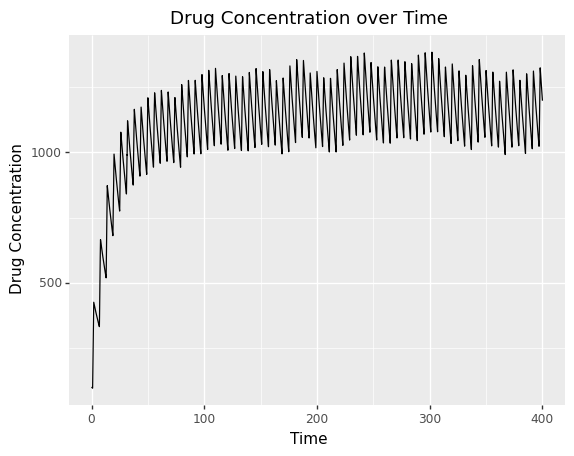

<ggplot: (8786716594017)>

In [90]:
ggplot(df, aes(x="Time", y="Drug Concentration")) \
+ geom_line() \
+ labs(title="Drug Concentration over Time")

# CSCI CSI

Newton’s law of cooling

$\frac{du}{dt} = -h * ( u - s)$

* $u$ is temperature
* $s$ is outside temperature
* $h$ is a constant measured from experiments

What is the time of death?

Detectives find a body at 6:30pm. Temperature is 82. ½ hour later, body temperature is 79. The room temperature is 73. When did the person die?

Further investigation discovers that the Air Conditioning was programmed to go on at 6pm, changing the room temp from 78 to 73. Assume the constant $h$ is dependent on the properties of the body, and will not change. How does this new information affect your solution?

In [97]:
C = 82
s = 73
h = 1 / 73
sim_length = 30

def temp(u, t):
    c = u[0]
    dc = -h * (c - s)
    return [dc]

xs = np.linspace(0, sim_length, 200)
ys = rk4(temp, [C], xs)

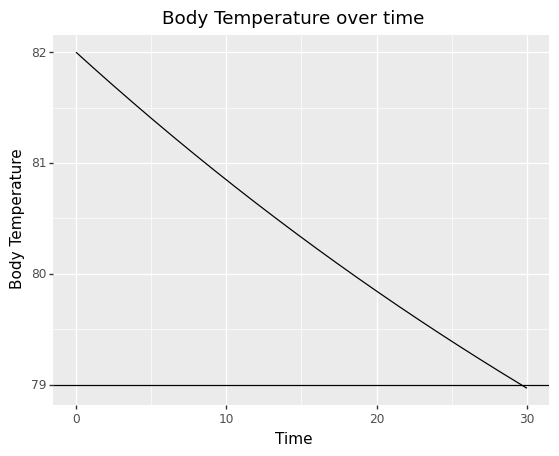

<ggplot: (8786717147938)>

In [98]:
df = pd.DataFrame(ys, columns=["Body Temperature"])
df["Time"] = xs
ggplot(df, aes(x="Time", y="Body Temperature")) \
+ geom_line() \
+ labs(title="Body Temperature over time") \
+ geom_hline(yintercept = 79)

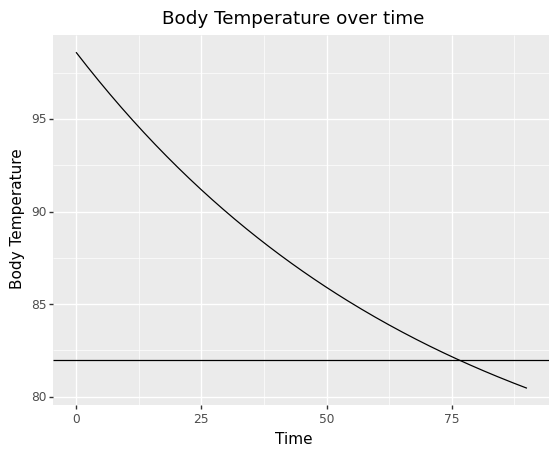

<ggplot: (8786742619224)>

In [99]:
C = 98.6
sim_length = 90
xs = np.linspace(0, sim_length, 200)
ys = rk4(temp, [C], xs)
df = pd.DataFrame(ys, columns=["Body Temperature"])
df["Time"] = xs
ggplot(df, aes(x="Time", y="Body Temperature")) \
+ geom_line() \
+ labs(title="Body Temperature over time") \
+ geom_hline(yintercept = 82)

In [100]:
C = 98.6
h = 1 / 73
sim_length = 94

def thermostat(t):
    if t < sim_length - 30:
        return 78
    else:
        return 73

def temp(u, t):
    c = u[0]
    dc = -h * (c - thermostat(t))
    return [dc]

xs = np.linspace(0, sim_length, sim_length * 4)
ys = rk4(temp, [C], xs)

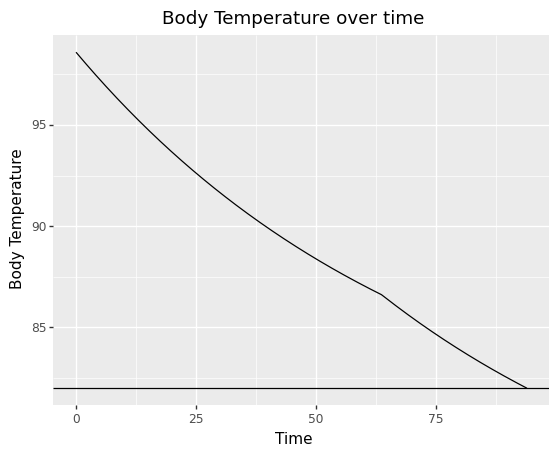

<ggplot: (8786743720945)>

In [101]:
df = pd.DataFrame(ys, columns=["Body Temperature"])
df["Time"] = xs

ggplot(df, aes(x="Time", y="Body Temperature")) \
+ geom_line() \
+ labs(title="Body Temperature over time") \
+ geom_hline(yintercept = 82)